In [ ]:
# this notebook compares the C/S prediction vs C/R prediction

In [53]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv("data/c_to_s_vs_c_to_r.csv") #https://querybuilder-ea.uberinternal.com/r/91mlCZ2G1/run/ymgmB1JA1/edit

In [55]:
data.columns

Index(['c_to_r_label', 'c_to_s_label', 'c_to_r_prediction',
       'c_to_s_prediction'],
      dtype='object')

In [64]:
data['c_to_r_label'] = data['c_to_r_label'].map({True:1, False:0})
data['c_to_s_label'] = data['c_to_s_label'].map({True:1, False:0})

In [66]:
(data['c_to_s_label'] - data['c_to_r_label']).value_counts()

 0    357830
 1     81336
-1       144
dtype: int64

In [69]:
144/data.shape[0]*100

0.032778675650451845

(array([  1425.,  42352.,  27399.,  26021.,  30076.,  37839.,  46412.,
         54189.,  60180., 113417.]),
 array([0.39661816, 0.44720325, 0.49778835, 0.54837344, 0.59895853,
        0.64954363, 0.70012872, 0.75071382, 0.80129891, 0.851884  ,
        0.9024691 ]),
 <BarContainer object of 10 artists>)

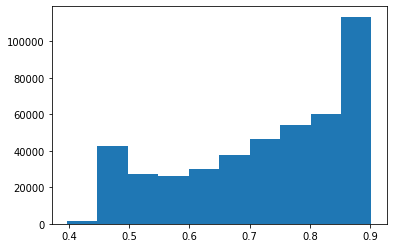

In [56]:
plt.hist(data['c_to_s_prediction'])

(array([12476., 19766., 33941., 44491., 52050., 56248., 63738., 65445.,
        61841., 29314.]),
 array([0.        , 0.09454839, 0.18909678, 0.28364518, 0.37819357,
        0.47274196, 0.56729035, 0.66183875, 0.75638714, 0.85093553,
        0.94548392]),
 <BarContainer object of 10 artists>)

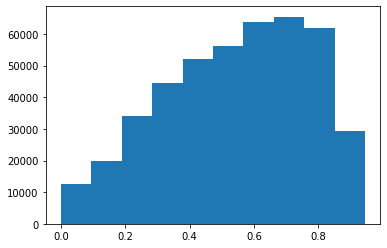

In [57]:
plt.hist(data['c_to_r_prediction'])

In [58]:
sam = data[(data['c_to_s_prediction'] - data['c_to_r_prediction'] < 0)]
(sam['c_to_s_prediction'] - sam['c_to_r_prediction']).mean()

-0.04230280596525873

In [59]:
(data['c_to_s_prediction'] - data['c_to_r_prediction'] > 0).sum()/data.shape[0]

0.9525961166374541

Text(0.5, 1.0, 'Distribution for P(C/S | driver_cancel) - P(C/R | driver_cancel) prediction, mean = 0.19')

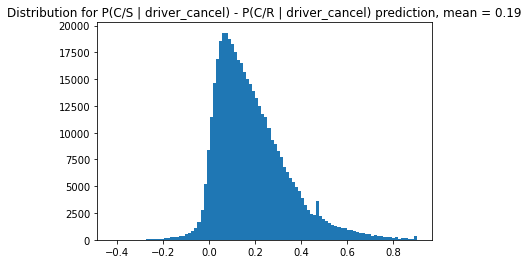

In [52]:
plt.hist(data['c_to_s_prediction'] - data['c_to_r_prediction'], bins=100)
mu = (data['c_to_s_prediction'] - data['c_to_r_prediction']).mean()
plt.title("Distribution for P(C/S | driver_cancel) - P(C/R | driver_cancel) prediction, mean = {:.2f}".format(mu))